<a href="https://colab.research.google.com/github/anshupandey/Machine_Learning_Training/blob/master/Clustering_DBSCAN_and_KMeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Retail customer segmentation using KMeans

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Collection and Exploration

In [ ]:
df = pd.read_csv("Wholesale customers data.csv")
df.shape

(440, 8)

In [ ]:
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


## Data Cleaning

In [ ]:
# check for missing values
df.isnull().sum()

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

In [ ]:
# check for duplicate entries
df.duplicated().sum()

0

In [ ]:
# check for outliers
df.skew()

Channel              0.760951
Region              -1.283627
Fresh                2.561323
Milk                 4.053755
Grocery              3.587429
Frozen               5.907986
Detergents_Paper     3.631851
Delicassen          11.151586
dtype: float64

In [ ]:
def treat_outlier(col,df=df,thresh=0.95):
  print("Skewness Before: ",df[col].skew())
  th_val = df[col][df[col]<df[col].quantile(thresh)].max()
  df[col][df[col]>th_val] = th_val
  print("Skewness After: ",df[col].skew())

In [ ]:
treat_outlier("Fresh",df,0.95)

Skewness Before:  2.561322751927935
Skewness After:  1.0778027940246893


In [ ]:
treat_outlier("Milk",df,0.93)

Skewness Before:  4.053754849210881
Skewness After:  1.0108058996773641


In [ ]:
treat_outlier("Grocery",df,0.93)

Skewness Before:  3.5874286903915453
Skewness After:  1.0799814819670646


In [ ]:
treat_outlier("Frozen",df,0.91)

Skewness Before:  5.9079856924559575
Skewness After:  1.1409403306268457


In [ ]:
df.skew()

Channel              0.760951
Region              -1.283627
Fresh                1.077803
Milk                 1.010806
Grocery              1.079981
Frozen               1.140940
Detergents_Paper     3.631851
Delicassen          11.151586
dtype: float64

## Feature Preprocessing

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

transformer = ColumnTransformer([("sc",StandardScaler(),[2,3,4,5]),])
x = transformer.fit_transform(df)
x = pd.DataFrame(x,columns=transformer.get_feature_names_out())
x.head()

,sc__Fresh,sc__Milk,sc__Grocery,sc__Frozen
0,0.133580,1.108580,0.069252,-0.948288
1,-0.421911,1.145086,0.386729,-0.311176
2,-0.491595,0.907560,0.088709,-0.046536
3,0.192574,-0.896881,-0.459084,1.599338
4,1.118062,0.102057,0.011831,0.574937


In [ ]:
x2 = x[['sc__Fresh','sc__Milk']]

## Applying K Means

In [ ]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters=3,random_state=5,verbose=True)

#train the model
model.fit(x2)

Initialization complete
Iteration 0, inertia 448.6316196093134.
Iteration 1, inertia 311.9928775697179.
Iteration 2, inertia 304.20092671904996.
Iteration 3, inertia 301.8550347565358.
Iteration 4, inertia 301.1537106831995.
Iteration 5, inertia 300.82679557188334.
Iteration 6, inertia 300.7773926872551.
Iteration 7, inertia 300.6496203253045.
Iteration 8, inertia 300.56427282191964.
Iteration 9, inertia 300.4667704096332.
Converged at iteration 9: strict convergence.
Initialization complete
Iteration 0, inertia 424.49186964225066.
Iteration 1, inertia 338.654666587004.
Iteration 2, inertia 316.8704099441592.
Iteration 3, inertia 312.47616641433285.
Iteration 4, inertia 311.0228421112817.
Iteration 5, inertia 310.4259868951632.
Iteration 6, inertia 310.1960869397201.
Iteration 7, inertia 310.03731455545153.
Iteration 8, inertia 309.76908782039686.
Iteration 9, inertia 309.73251074230046.
Iteration 10, inertia 309.7069355335643.
Iteration 11, inertia 309.6617078554631.
Iteration 12, ine

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3, random_state=5, verbose=True)

In [ ]:
x2['cluster'] = model.labels_
x2

<ipython-input-16-6c8d7e7b149b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x2['cluster'] = model.labels_


,sc__Fresh,sc__Milk,cluster
0,0.133580,1.108580,1
1,-0.421911,1.145086,1
2,-0.491595,0.907560,1
3,0.192574,-0.896881,0
4,1.118062,0.102057,2
...,...,...,...
435,1.819652,1.676320,2
436,2.523815,-0.841173,2
437,0.317886,2.290285,1
438,-0.101900,-0.710795,0


In [ ]:
# evaluate cluster centers
pd.DataFrame(model.cluster_centers_,columns=['Fresh','Milk'])

,Fresh,Milk
0,-0.466954,-0.561962
1,-0.540144,1.420497
2,1.431550,-0.088906


#### Observations
1. Cluster 0: Moderate spenders on Fresh products but Lowest spenders on Milk Products

2. Cluster 1: Lowest Spenders on Fresh but highest spenders on Milk

3. Cluster 2: Highest spenders on Fresh but Moderate on Milk


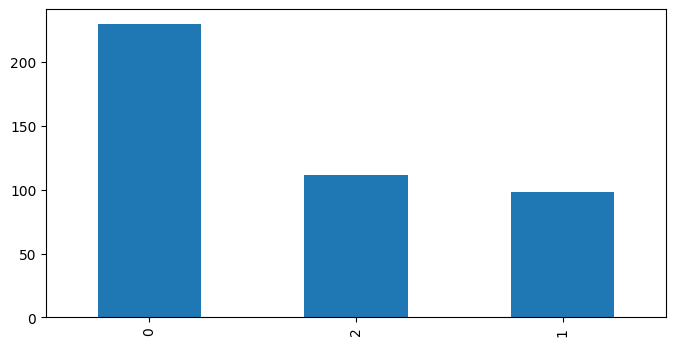

In [ ]:
# check the size of each of cluster
plt.figure(figsize=(8,4))
x2['cluster'].value_counts().plot(kind='bar')
plt.show()

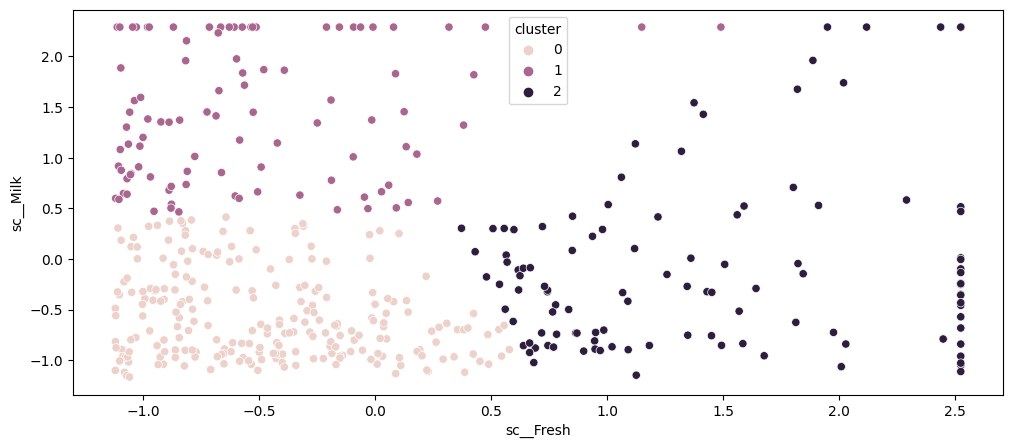

In [ ]:
plt.figure(figsize=(12,5))
sns.scatterplot(data=x2,x='sc__Fresh',y='sc__Milk',hue='cluster')
plt.show()

### K Means clustering on 4 features

In [ ]:
x.head()

,sc__Fresh,sc__Milk,sc__Grocery,sc__Frozen
0,0.133580,1.108580,0.069252,-0.948288
1,-0.421911,1.145086,0.386729,-0.311176
2,-0.491595,0.907560,0.088709,-0.046536
3,0.192574,-0.896881,-0.459084,1.599338
4,1.118062,0.102057,0.011831,0.574937


In [ ]:
from sklearn.cluster import KMeans

model2= KMeans(n_clusters=3,random_state=5,verbose=True)

model2.fit(x)

Initialization complete
Iteration 0, inertia 1466.2786654584725.
Iteration 1, inertia 848.2664893862461.
Iteration 2, inertia 845.5796406107095.
Iteration 3, inertia 843.8703227906838.
Iteration 4, inertia 842.931990053231.
Iteration 5, inertia 842.7339193591833.
Iteration 6, inertia 842.4531896793067.
Iteration 7, inertia 842.3870517107291.
Iteration 8, inertia 842.2324763355912.
Iteration 9, inertia 842.0060841984534.
Converged at iteration 9: strict convergence.
Initialization complete
Iteration 0, inertia 1051.6955480523218.
Iteration 1, inertia 850.262662462442.
Iteration 2, inertia 848.0220827580545.
Iteration 3, inertia 847.2051588868842.
Iteration 4, inertia 846.6806951489488.
Iteration 5, inertia 846.1979730637776.
Iteration 6, inertia 846.0546072283755.
Iteration 7, inertia 845.8676789563026.
Iteration 8, inertia 845.7024154822052.
Iteration 9, inertia 845.5908530508032.
Iteration 10, inertia 845.1629995203115.
Iteration 11, inertia 843.9021620755946.
Iteration 12, inertia 84

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3, random_state=5, verbose=True)

In [ ]:
# evaluate cluster centers
pd.DataFrame(model2.cluster_centers_,columns=x.columns)

,sc__Fresh,sc__Milk,sc__Grocery,sc__Frozen
0,1.077993,-0.259027,-0.361810,1.422752
1,-0.387688,1.205687,1.249793,-0.390465
2,-0.258544,-0.559881,-0.539222,-0.408999


In [ ]:
pd.DataFrame(transformer.named_transformers_['sc'].inverse_transform(model2.cluster_centers_),columns=x.columns)

,sc__Fresh,sc__Milk,sc__Grocery,sc__Frozen
0,22210.185567,3886.773196,4835.938144,5974.948454
1,7402.747967,10065.642276,15024.056911,1569.349593
2,8707.454545,2617.627273,3714.386364,1524.318182


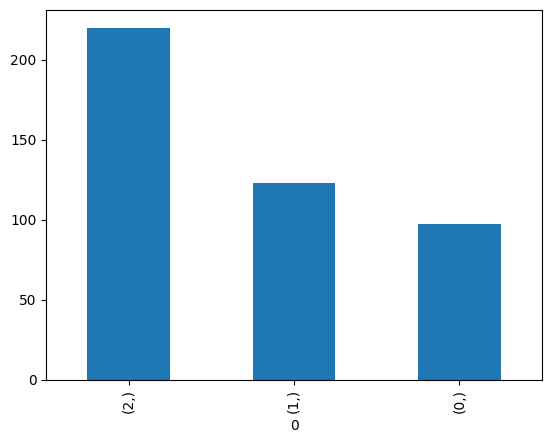

In [ ]:
pd.DataFrame(model2.labels_).value_counts().plot(kind='bar')
plt.show()

In [ ]:
sns.set_theme()

## Elbow Method

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

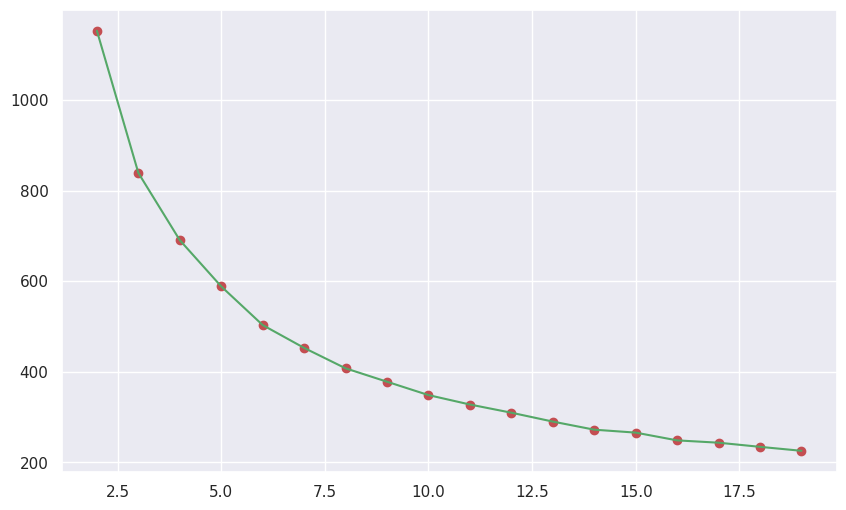

In [ ]:
inertia = []
k = np.arange(2,20)

for i in k:
  model = KMeans(n_clusters=i,random_state=1)
  model.fit(x)
  inertia.append(model.inertia_)


plt.figure(figsize=(10,6))
plt.scatter(k,inertia,c='r')
plt.plot(k,inertia,c='g')
plt.show()

In [ ]:
from sklearn.cluster import KMeans

model2= KMeans(n_clusters=5,random_state=5)

model2.fit(x)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=5, random_state=5)

In [ ]:
# evaluate cluster centers
pd.DataFrame(model2.cluster_centers_,columns=x.columns)

,sc__Fresh,sc__Milk,sc__Grocery,sc__Frozen
0,-0.251919,-0.688628,-0.649042,-0.422587
1,2.020711,0.146061,0.037630,0.627016
2,-0.499238,0.530328,0.536640,-0.560382
3,0.068411,-0.434575,-0.620118,1.770464
4,-0.418545,1.816796,1.998094,-0.265650


In [ ]:
pd.DataFrame(transformer.named_transformers_['sc'].inverse_transform(model2.cluster_centers_),columns=x.columns)

,sc__Fresh,sc__Milk,sc__Grocery,sc__Frozen
0,8774.392265,2074.508287,3020.138122,1491.303867
1,31734.259259,5595.629630,7361.092593,4041.537037
2,6275.782609,7216.652174,10515.695652,1156.500000
3,12010.606557,3146.229508,3202.983607,6819.786885
4,7091.000000,12643.596154,19754.615385,1872.615385


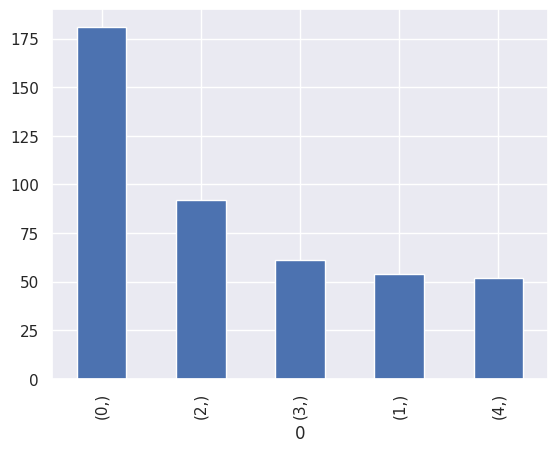

In [ ]:
pd.DataFrame(model2.labels_).value_counts().plot(kind='bar')
plt.show()

# DBSCAN Implementation

In [ ]:
df = pd.read_csv("Wholesale customers data.csv")
df.shape

(440, 8)

In [ ]:
df.skew()

Channel              0.760951
Region              -1.283627
Fresh                2.561323
Milk                 4.053755
Grocery              3.587429
Frozen               5.907986
Detergents_Paper     3.631851
Delicassen          11.151586
dtype: float64

In [ ]:
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [ ]:
# feature scaling
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

transformer = ColumnTransformer([("sc",StandardScaler(),[2,3,4,5]),])
x = transformer.fit_transform(df)
x = pd.DataFrame(x,columns=transformer.get_feature_names_out())
x.head()

,sc__Fresh,sc__Milk,sc__Grocery,sc__Frozen
0,0.052933,0.523568,-0.041115,-0.589367
1,-0.391302,0.544458,0.170318,-0.270136
2,-0.447029,0.408538,-0.028157,-0.137536
3,0.100111,-0.624020,-0.392977,0.687144
4,0.840239,-0.052396,-0.079356,0.173859


In [ ]:
from sklearn.cluster import DBSCAN


model2 = DBSCAN(eps=0.6,min_samples=10)

model2.fit(x)

DBSCAN(eps=0.6, min_samples=10)

In [ ]:
x['cluster'] = model2.labels_
x.head(10)

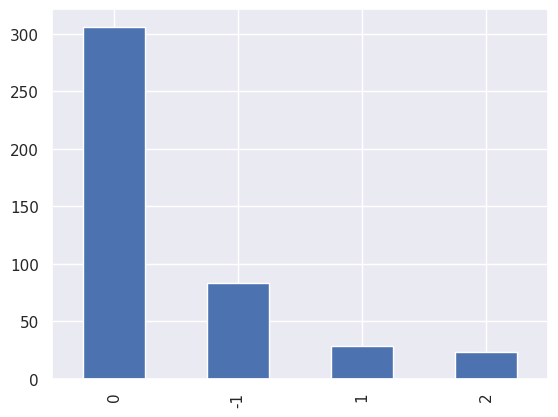

In [ ]:
x['cluster'].value_counts().plot(kind='bar')
plt.show()

In [ ]:
n_clusters = len(set(model2.labels_)) -(1 if -1 in model2.labels_ else 0)
n_clusters

3

In [ ]:
from sklearn.manifold import TSNE

x2 = TSNE(n_components=2).fit_transform(x)
x2.shape

(440, 2)

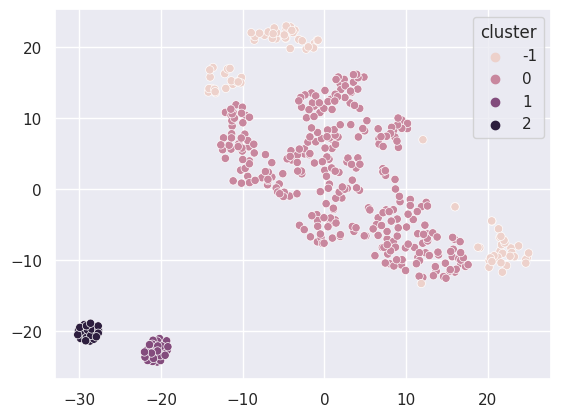

In [ ]:
sns.scatterplot(x=x2[:,0],y=x2[:,1],hue=x['cluster'])
plt.show()

In [ ]:
x['cluster'].unique()

array([ 0, -1,  1,  2])

In [ ]:
x.groupby('cluster').mean()

,sc__Fresh,sc__Milk,sc__Grocery,sc__Frozen
cluster,,,,
-1,1.033578,0.937112,0.805451,0.831991
0,-0.176169,-0.159890,-0.109632,-0.148534
1,-0.810096,-0.531372,-0.643265,-0.491353
2,-0.399854,-0.607636,-0.664944,-0.428084
